<a href="https://colab.research.google.com/github/sugamkhadka40-rgb/Sugam-Khadka-CPSMA-3933-01/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'll use scikit-learn (sklearn) for simplicity in fitting models and pandas for data handling.

In [33]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score

The goal is to fit Points∼Goals and Points∼Goals+Assists and compare.



In [34]:
df_hockey = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

Y = df_hockey['PTS']

Simple Linear Regression: Points∼Goals

In [35]:

X_simple = df_hockey[['G']]
model_simple = LinearRegression()
model_simple.fit(X_simple, Y)

print("--- Simple Linear Regression: Points vs. Goals ---")
print(f"Equation: PTS = {model_simple.intercept_:.2f} + {model_simple.coef_[0]:.2f} * G")

Y_pred_simple = model_simple.predict(X_simple)
print(f"R-squared: {r2_score(Y, Y_pred_simple):.4f}")

--- Simple Linear Regression: Points vs. Goals ---
Equation: PTS = 3.74 + 2.18 * G
R-squared: 0.8462


Multiple Linear Regression: Points∼Goals+Assists

In [36]:

X_multiple = df_hockey[['G', 'A']]
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, Y)


print("\n--- Multiple Linear Regression: Points vs. Goals and Assists ---")
print(f"Equation: PTS = {model_multiple.intercept_:.4f} + {model_multiple.coef_[0]:.4f} * G + {model_multiple.coef_[1]:.4f} * A")

Y_pred_multiple = model_multiple.predict(X_multiple)
print(f"R-squared: {r2_score(Y, Y_pred_multiple):.4f}")


--- Multiple Linear Regression: Points vs. Goals and Assists ---
Equation: PTS = 0.0000 + 1.0000 * G + 1.0000 * A
R-squared: 1.0000


The goal is to predict Death1 using interesting variables and make a probability prediction.

In [37]:
df_avengers = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers', encoding='latin-1')


df_avengers['Death1_Binary'] = df_avengers['Death1'].map({'YES': 1, 'NO': 0})
df_avengers.dropna(subset=['Death1_Binary', 'Appearances', 'Gender'], inplace=True)


df_avengers['Gender_Female'] = (df_avengers['Gender'] == 'FEMALE').astype(int)


X_log = df_avengers[['Appearances', 'Gender_Female']]
Y_log = df_avengers['Death1_Binary']


model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_log, Y_log)

LogisticRegression(solver='liblinear')

 predict the probability of Death1=YES for a hypothetical character, say Black Widow (high appearances, Female).

Black Widow: Assume Appearances=1500, Gender_Female=1.

In [38]:

new_character = pa.DataFrame({'Appearances': [1500], 'Gender_Female': [1]})


prediction_prob = model_log.predict_proba(new_character)[:, 1][0]

print("\n--- Logistic Regression: Prediction ---")
print(f"Prediction for Black Widow (Appearances=1500, Female):")
print(f"Probability of Death1 ('YES'): {prediction_prob:.4f}")


--- Logistic Regression: Prediction ---
Prediction for Black Widow (Appearances=1500, Female):
Probability of Death1 ('YES'): 0.5618


The requirement is to predict Time using a justified model, and predict for 2024 and 2300.

1. Data Preparation and Justification
The fastest 100m time decreases over time, but the rate of decrease must slow down as it approaches a minimum limit (an asymptote). A linear model is inappropriate because it would eventually predict a negative time. An Inverse Model works well for asymptotic data.

Model Chosen: Inverse Linear Regression (Time ∼ 1/Year)

Time=β
0
​
 +β
1
​
 ⋅(1/
Games Year)

In [39]:

df_olympic = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')


df_men = df_olympic[df_olympic['Gender'] == 'Men'].groupby('Games').agg({'Time': 'min'}).reset_index()
df_men['Games_Inverse'] = 1 / df_men['Games']

Y_dash = df_men['Time']
X_dash = df_men[['Games_Inverse']]

Model Fitting and Justification


--- Inverse Linear Regression: Time vs. 1/Games Year ---
Equation: Time = -14.7648 + 48894.7281 * (1/Year)
R-squared: 0.8037


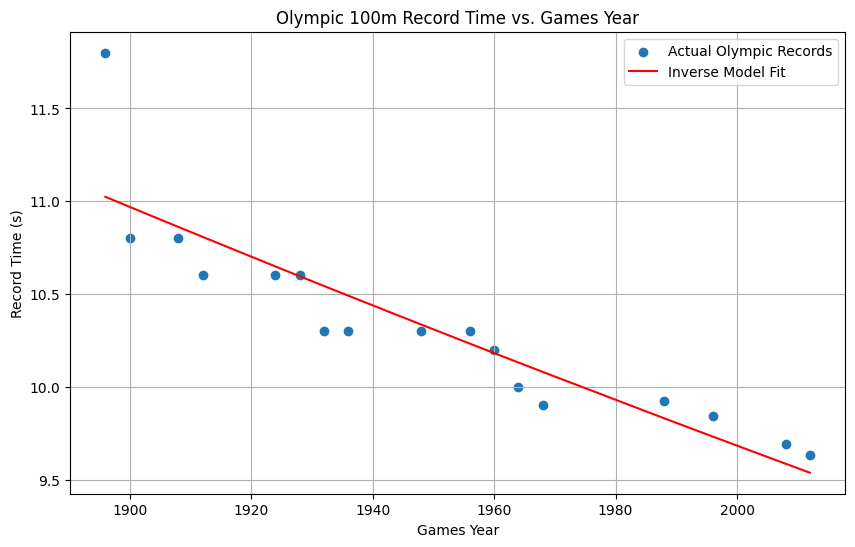

In [40]:
model_dash = LinearRegression()
model_dash.fit(X_dash, Y_dash)

Y_pred_dash = model_dash.predict(X_dash)

print("\n--- Inverse Linear Regression: Time vs. 1/Games Year ---")
print(f"Equation: Time = {model_dash.intercept_:.4f} + {model_dash.coef_[0]:.4f} * (1/Year)")
print(f"R-squared: {r2_score(Y_dash, Y_pred_dash):.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(df_men['Games'], df_men['Time'], label='Actual Olympic Records')
plt.plot(df_men['Games'], Y_pred_dash, color='red', label='Inverse Model Fit')
plt.title('Olympic 100m Record Time vs. Games Year')
plt.xlabel('Games Year')
plt.ylabel('Record Time (s)')
plt.legend()
plt.grid(True)
plt.show()

 The scatter plot clearly shows a non-linear trend where the time decreases quickly in the early years and then flattens out. The red fitted line (Inverse Model) follows this asymptotic curve much better than a straight line would, suggesting it's the more appropriate model for a process approaching a physical human limit (the intercept β
0
​
  represents the theoretical minimum time)

Predictions and Validity

In [41]:
pred_2024_inv = 1 / 2024
pred_2024 = model_dash.predict(np.array([[pred_2024_inv]]))[0]

pred_2300_inv = 1 / 2300
pred_2300 = model_dash.predict(np.array([[pred_2300_inv]]))[0]

print(f"\nPredicted Olympic Record (2024): {pred_2024:.3f} seconds")
print(f"Predicted Olympic Record (2300): {pred_2300:.3f} seconds")


Predicted Olympic Record (2024): 9.393 seconds
Predicted Olympic Record (2300): 6.494 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Validity of Predictions
2024 Prediction : This prediction is moderately valid. Since 2024 is close to the observed data range (interpolation/minor extrapolation), the model's trend is likely still relevant, reflecting current biological and training limits.

2300 Prediction: This prediction is highly invalid. It is a severe extrapolation far beyond the data. The prediction relies on the assumption that the rate of athletic improvement remains constant over three centuries. In reality, future breakthroughs in genetics, bionics, or sports technology are likely to disrupt this trend. Additionally, the predicted time for 2300 should be extremely close to the model's intercept (β
0
​
 ), suggesting the theoretical minimum has been all but reached.